<a href="https://colab.research.google.com/github/liangli217/LLM_learning/blob/main/OpenAI_Responses_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from openai import OpenAI

In [17]:
from google.colab import userdata
openai_key = userdata.get('OPENAI_API_KEY')

# Initialize the OpenAI client
client = OpenAI(api_key=openai_key)

In [3]:
response = client.responses.create(
    model = "gpt-4o",
    input = "write a one sentence poetry"

)

In [4]:
# Inputs can now be a single string or a list of messages

In [5]:
print(response.output_text )

Whispers of starlight dance on the edge of a waking dream.


The list of roles can be:
- system
- developer
- user
- assistant


In [6]:
response = client.responses.create(
    model = "gpt-4o",
    input = [
       {"role":"developer", "content": "talk like a pirate"},
        {"role":"user", "content": "write a one sentence poetry"}
    ],
    temperature  = 1

)

In [7]:
print(response.output_text)

Across the waves, the moon's silver coins be scattered, lighting the path of the wanderin' heart.


💡 **Token Usage**

In [8]:
print(f"Input tokens: {response.usage.input_tokens}")
print(f"Output tokens: {response.usage.output_tokens}")

Input tokens: 20
Output tokens: 23


**💡 Function Calling (Tools)**

In [9]:
tools = [
    {
        "type":"function",

        "name": "get_cheese_pairing",
        "description": "Get wine pairing recommendations for a specific cheese",
        "parameters": {
            "type": "object",
            "properties":{
                "cheese_type":{
                    "type": "string",
                    "description": "The type of cheese (e.g., cheddar, brie, gouda)"
                },
                "intensity":{
                    "type": "string",
                    "enum"
                    "description": "The flavor intensity of the cheese"
                }
                },
                "required": ["cheese_type"]
                }
        }

]

In [10]:
# Make a request that should trigger function calling
response = client.responses.create(
    model="gpt-4o-mini",
    input=[
        {"role": "user", "content": "What wine should I pair with aged cheddar?"}
    ],
    tools=tools,

)

In [11]:
response

Response(id='resp_028abb3ae32112c40068e03a0e81448194aa90966cddd57972', created_at=1759525390.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-4o-mini-2024-07-18', object='response', output=[ResponseFunctionToolCall(arguments='{"cheese_type":"cheddar","intensity":"aged"}', call_id='call_uvseMdcxxmkUTeUl4U6TWtWC', name='get_cheese_pairing', type='function_call', id='fc_028abb3ae32112c40068e03a0f9cb0819492a50aa3e87e4eb2', status='completed')], parallel_tool_calls=True, temperature=1.0, tool_choice='auto', tools=[FunctionTool(name='get_cheese_pairing', parameters={'type': 'object', 'properties': {'cheese_type': {'type': 'string', 'description': 'The type of cheese (e.g., cheddar, brie, gouda)'}, 'intensity': {'type': 'string', 'enumdescription': 'The flavor intensity of the cheese'}}, 'required': ['cheese_type', 'intensity'], 'additionalProperties': False}, strict=True, type='function', description='Get wine pairing recommendations for a specific cheese')]

**💡 Vision API**

In [12]:
response = client.responses.create(
    model="gpt-4o-mini",
    input=[
        {"role": "user", "content": [
            {"type": "input_text",
             "text": "What type of cheese do you see in this image"},

                {"type": "input_image",
                "image_url":  "https://upload.wikimedia.org/wikipedia/commons/5/52/Swiss_Cheese.jpg"}]
            }
        ]
    ,

)

In [13]:
response.output_text

'The cheeses in the image are Swiss Gruyère and Swiss Fribourg.'

**Create images with DALL-E**

In [31]:
from PIL import Image
from io import BytesIO
from base64 import b64decode
from requests import get

In [25]:
from openai import OpenAI
import base64


prompt = """
A children's book drawing of a veterinarian using a stethoscope to
listen to the heartbeat of a baby otter.
"""

result = client.images.generate(
    model="dall-e-3",
    prompt=prompt
)






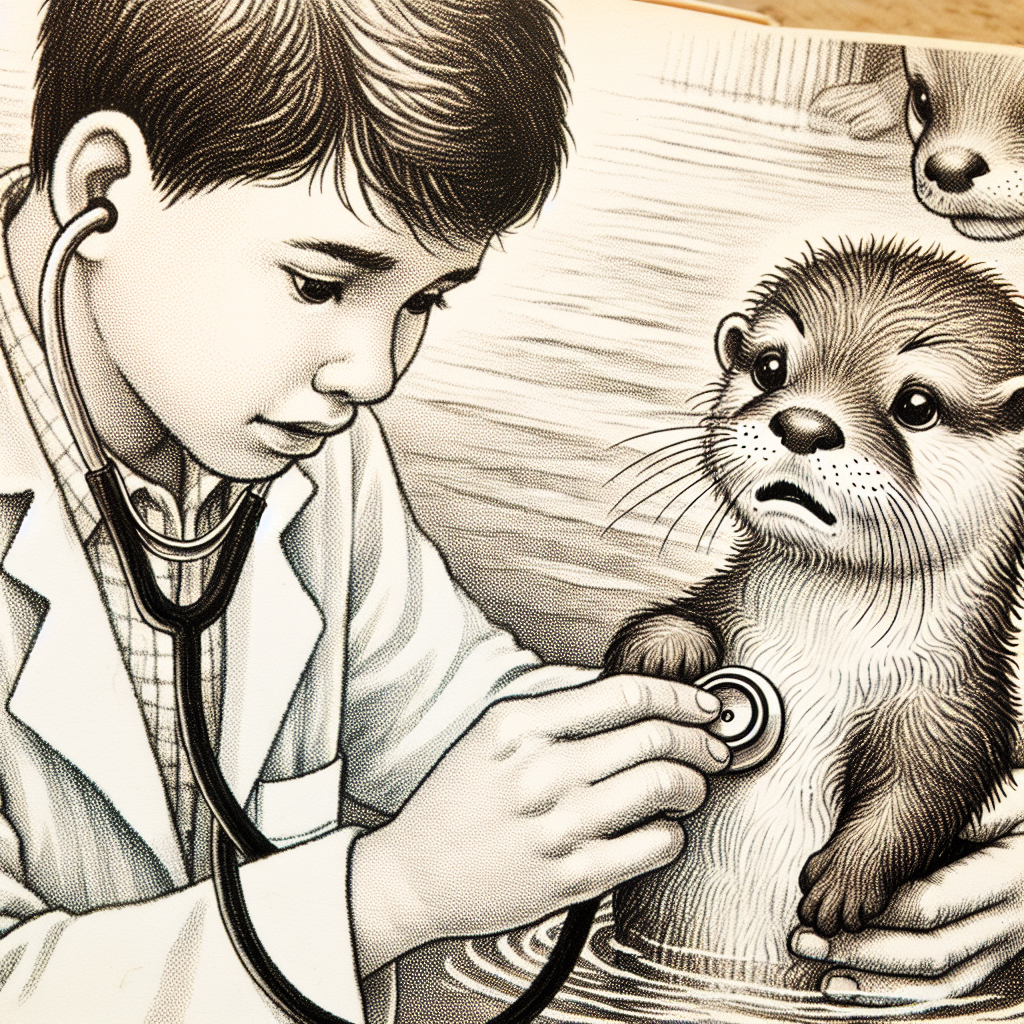

In [38]:
# Retrieve the image from a URL & display
img_bytes = get(result.data[0].url).content ## we get the image from thr url here
img = Image.open(BytesIO(img_bytes))
display(img)

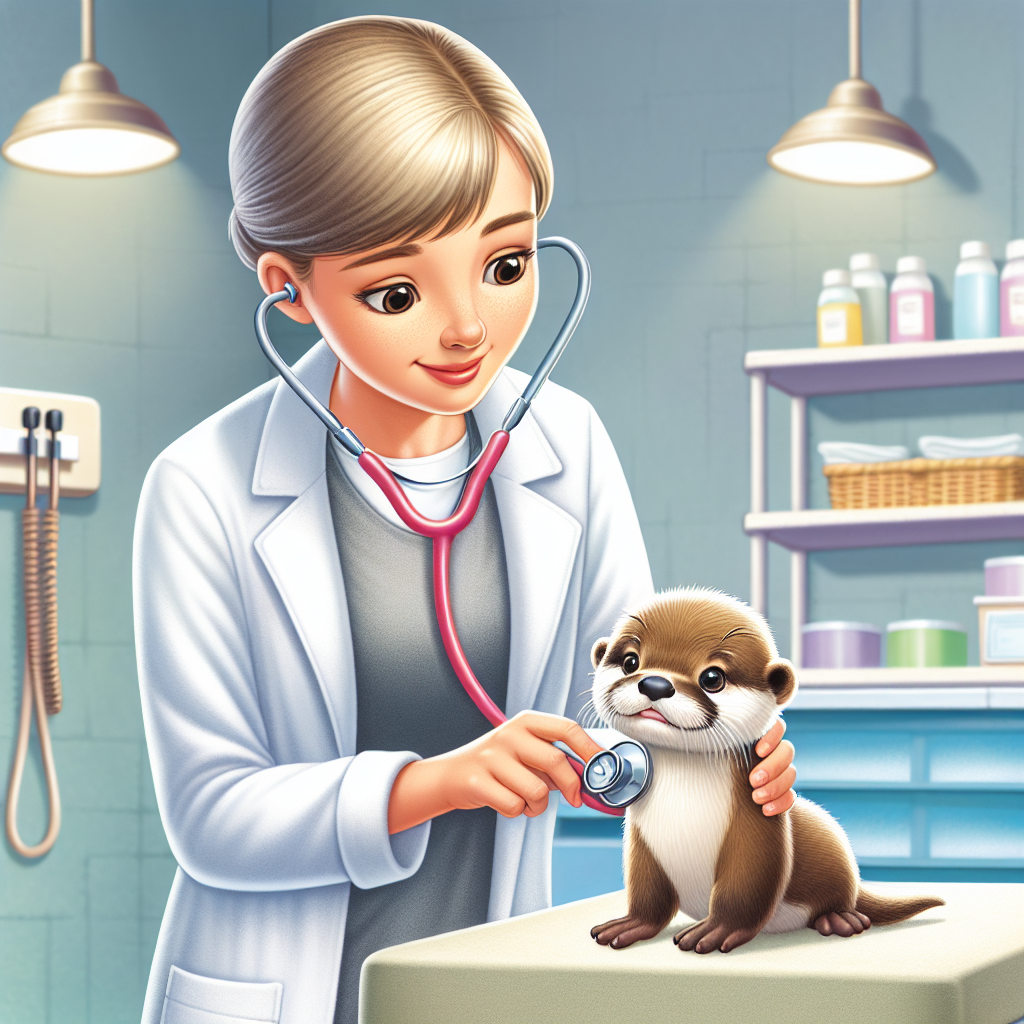

In [39]:
prompt = """
A children's book drawing of a veterinarian using a stethoscope to
listen to the heartbeat of a baby otter.
"""

result = client.images.generate(
    model="dall-e-3",
    prompt=prompt,
    style = "vivid"
)

# Retrieve the image from a URL & display
img_bytes = get(result.data[0].url).content ## we get the image from thr url here
img = Image.open(BytesIO(img_bytes))
display(img)


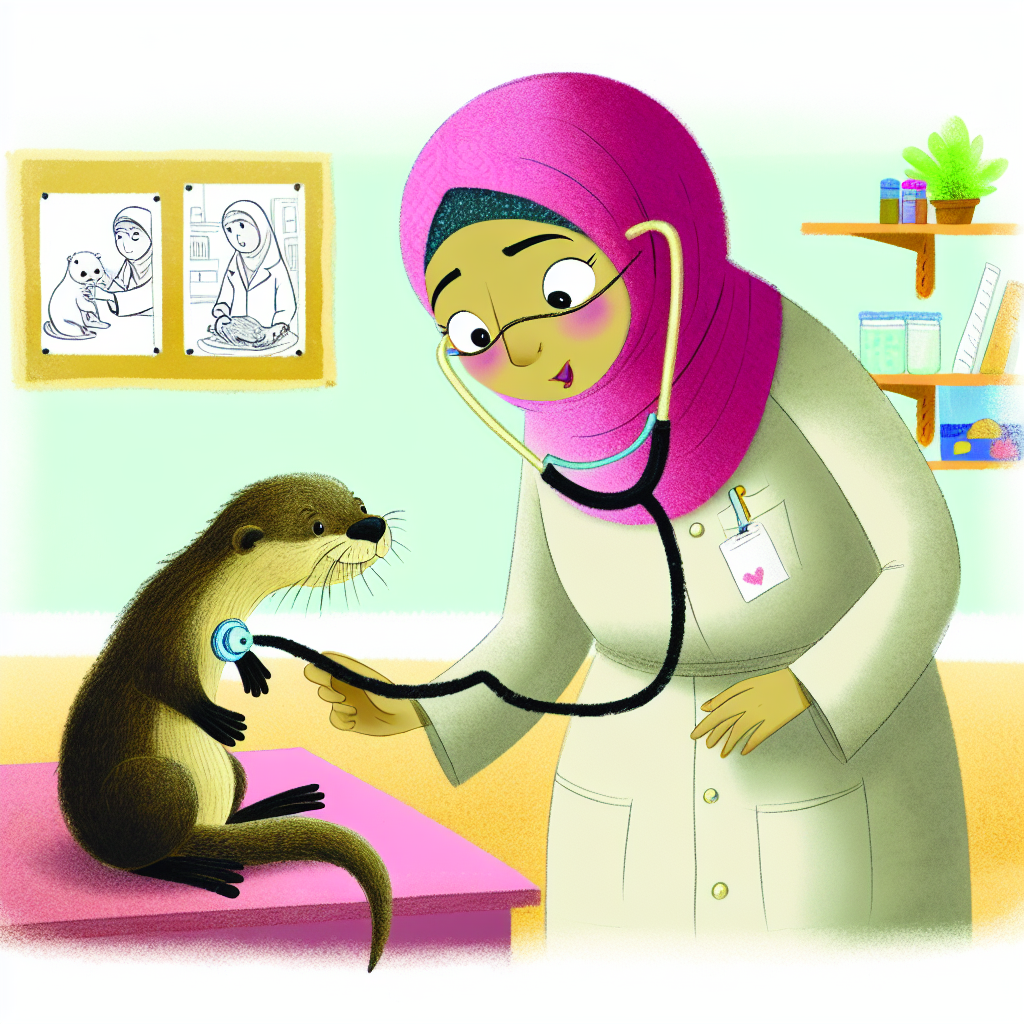

In [40]:
prompt = """
A children's book drawing of a veterinarian using a stethoscope to
listen to the heartbeat of a baby otter.
"""

result = client.images.generate(
    model="dall-e-3",
    prompt=prompt,
    style = "natural"
)

# Retrieve the image from a URL & display
img_bytes = get(result.data[0].url).content ## we get the image from thr url here
img = Image.open(BytesIO(img_bytes))
display(img)